--> Dropping redundant/duplicate columns

--> Checking for class imbalance

--> Label Encoding the categorical values

--> Modelling classifiers and evaluating them using metrics - Recall, Precision, Accuracy, F1 score & AUC-ROC

--> Comparison of results of the models(without handling class imbalance)

In [ ]:
!pip install scikit-learn-intelex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 11.5 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
!pip install daal4py

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = 0)

In [ ]:
data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016,1,1,1,2016-01-01,14747,SEA,14771,SFO,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016,1,1,1,2016-01-01,14747,SEA,12892,LAX,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016,1,1,1,2016-01-01,14747,SEA,12266,IAH,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016,1,1,1,2016-01-01,14747,SEA,10397,ATL,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840272,2017,4,12,17,2017-12-17,11618,EWR,13303,MIA,2100,...,1024,100,28,16,32,29,88,2017-12-17,2100,EWR
1840273,2017,4,12,17,2017-12-17,13930,ORD,14771,SFO,2322,...,1016,100,34,12,37,34,90,2017-12-17,2300,ORD
1840274,2017,4,12,17,2017-12-17,12266,IAH,12892,LAX,2159,...,1020,97,55,7,57,57,92,2017-12-17,2200,IAH
1840275,2017,4,12,17,2017-12-17,12266,IAH,11292,DEN,2151,...,1020,97,55,7,57,57,92,2017-12-17,2200,IAH


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840277 entries, 0 to 1840276
Data columns (total 33 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   FlightDate       object 
 5   OriginAirportID  int64  
 6   Origin           object 
 7   DestAirportID    int64  
 8   Dest             object 
 9   CRSDepTime       int64  
 10  DepTime          float64
 11  DepDelayMinutes  float64
 12  DepDel15         float64
 13  CRSArrTime       int64  
 14  ArrTime          float64
 15  ArrDelayMinutes  float64
 16  ArrDel15         float64
 17  New_time         int64  
 18  windspeedKmph    int64  
 19  winddirDegree    int64  
 20  weatherCode      int64  
 21  precipMM         float64
 22  visibility       int64  
 23  pressure         int64  
 24  cloudcover       int64  
 25  DewPointF        int64  
 26  WindGustKmph     int64  
 27  tempF       



**Checking for Class imbalance**

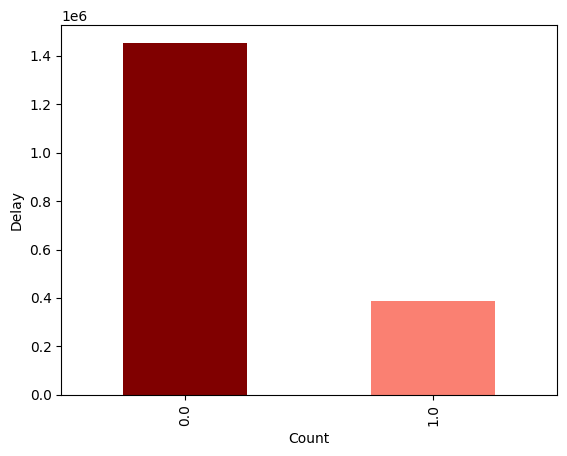

In [ ]:
data['ArrDel15'].value_counts().plot(kind = 'bar', color = ['maroon', 'salmon'])
plt.xlabel("Count")
plt.ylabel("Delay")
plt.show()

A class imbalance detected. This might lead to an accuracy paradox. Can be handled using Oversampling/undersampling


<ipython-input-9-a996b9c6164c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax = ax)


<Axes: >

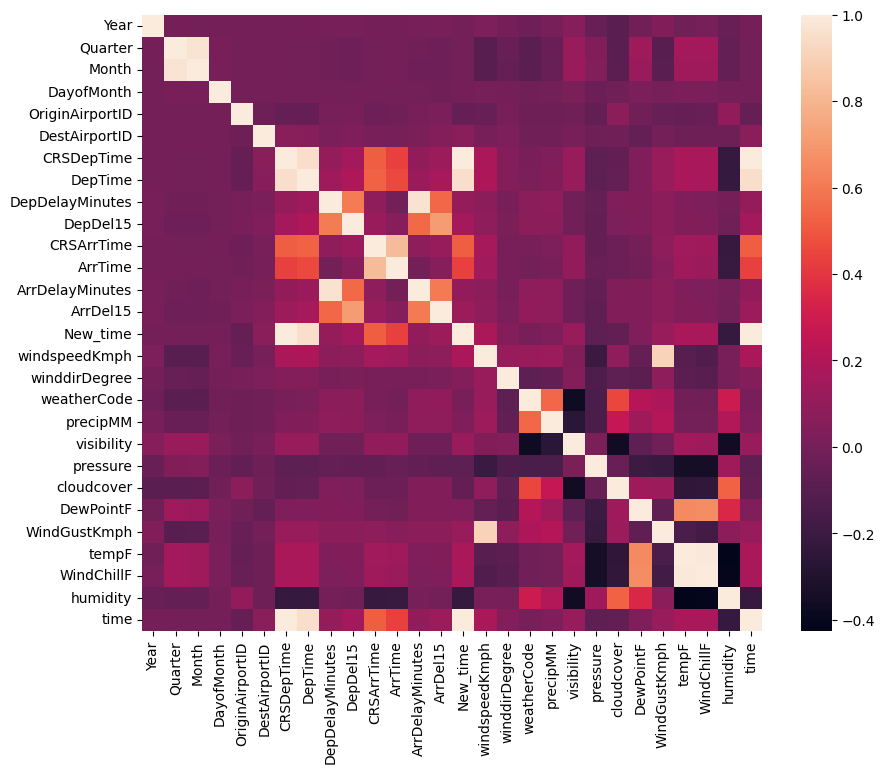

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(data.corr(), ax = ax)

In [ ]:
data[['time','New_time']]

,time,New_time
0,700,700
1,700,700
2,700,700
3,700,700
4,700,700
...,...,...
1840272,2100,2100
1840273,2300,2300
1840274,2200,2200
1840275,2200,2200


Dropping redundant/duplicate columns


In [ ]:
data.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "ArrDelayMinutes",
                 "New_time",
                 "date",
                 ],
        inplace=True)

In [ ]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [ ]:
data = data.drop(columns = 'airport_code')

In [ ]:
X = data.drop('ArrDel15', axis = 1)
y = data['ArrDel15']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Label encoding categorical values

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelling classifiers and evaluating them


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    436257
         1.0       0.90      0.68      0.77    115827

    accuracy                           0.92    552084
   macro avg       0.91      0.83      0.86    552084
weighted avg       0.92      0.92      0.91    552084



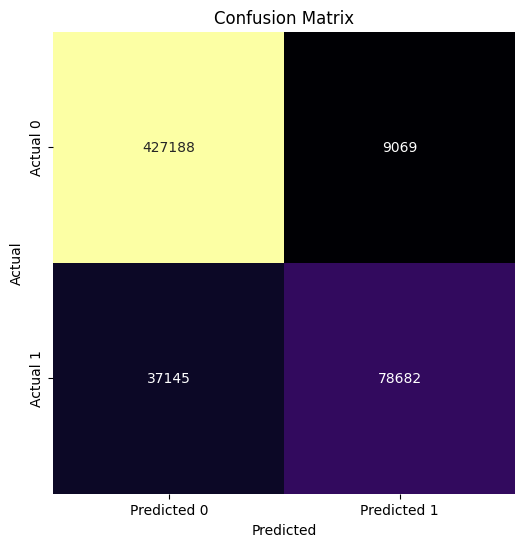


AUC-ROC: 0.9077934664400198


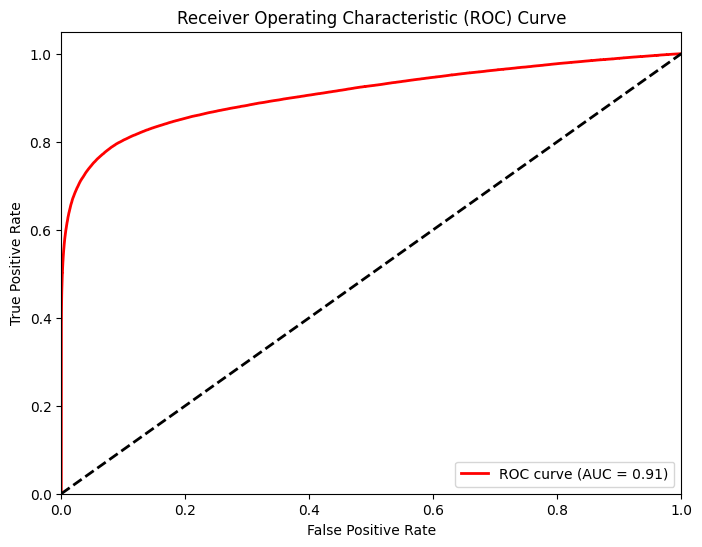

In [ ]:
#logistic classifier
logistic_start = time.time()
logistic_model = LogisticRegression(max_iter=3000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]
logistic_end = time.time()

classification_rep = classification_report(y_test, y_pred)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_prob)
roc_auc_lg = roc_auc_score(y_test, y_prob)

precision = classification_rep.split()[-8]
recall = classification_rep.split()[-7]
specificity = classification_rep.split()[-6]
f1_score = classification_rep.split()[-5]

print("\nClassification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAUC-ROC:", roc_auc_lg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lg))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    436257
         1.0       0.68      0.70      0.69    115827

    accuracy                           0.87    552084
   macro avg       0.80      0.81      0.80    552084
weighted avg       0.87      0.87      0.87    552084



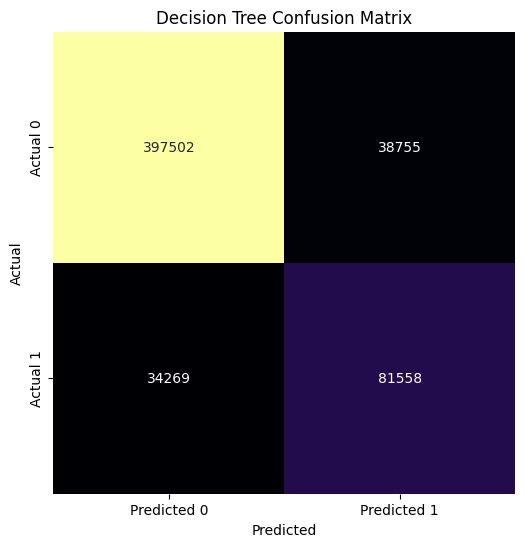


AUC-ROC: 0.8076750940492032


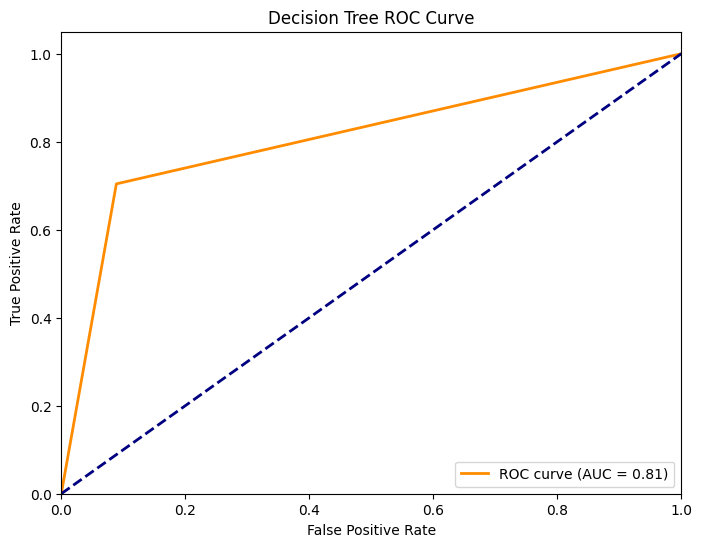

In [ ]:
#Decision Tree classifier
decision_start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]
decision_end = time.time()
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

custom_cmap = plt.get_cmap('inferno')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob)
roc_auc_dt = roc_auc_score(y_test, y_prob)
print("\nAUC-ROC:", roc_auc_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()





Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    436257
         1.0       0.88      0.70      0.78    115827

    accuracy                           0.92    552084
   macro avg       0.90      0.84      0.86    552084
weighted avg       0.92      0.92      0.91    552084



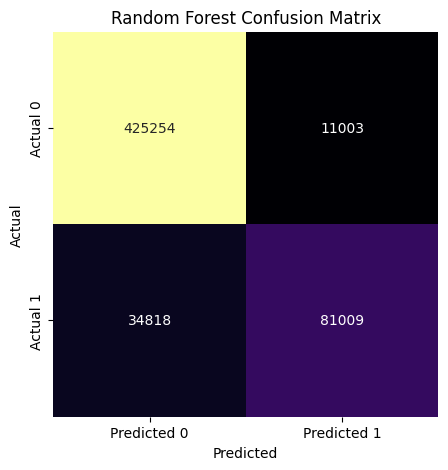


ROC AUC: 0.9257479088656396


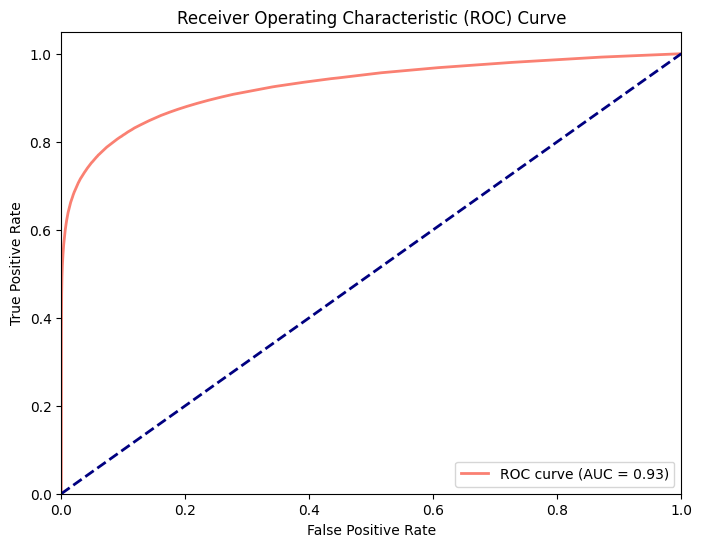

In [ ]:
# Random Forest Classifier
rf_start = time.time()
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]
rf_end = time.time()

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf= roc_auc_score(y_test, y_prob_rf)

print("\nClassification Report:")
print(classification_rep_rf)

plt.figure(figsize=(12, 5))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nROC AUC:", roc_auc_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='salmon', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

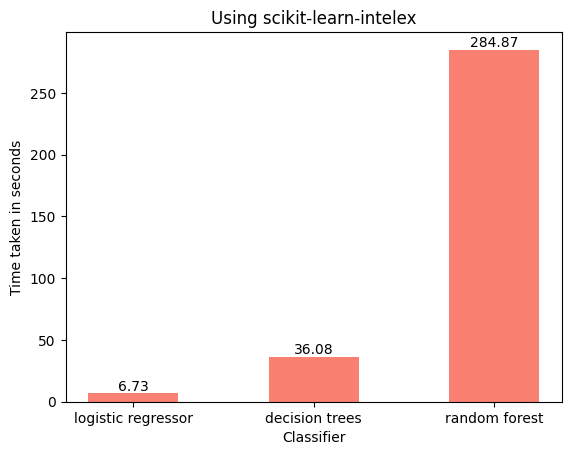

In [ ]:
time = [logistic_end -logistic_start, decision_end - decision_start, rf_end - rf_start]
bars = plt.bar(['logistic regressor', 'decision trees', 'random forest'], time, width = 0.5, color = 'salmon')
plt.xlabel('Classifier')
plt.ylabel('Time taken in seconds')
plt.title('Using scikit-learn-intelex')
for bar in bars:
    height = bar.get_height()
    height = height.round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')